In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:

# Cargar los datos (reemplaza con tus fuentes)
# Por ejemplo, usando datos ficticios para ilustrar
data = {
    'fecha': pd.date_range(start='2015-01-01', periods=60, freq='M'),
    'pib_manufacturero': np.random.rand(60) * 1000,
    'tasa_empleo': np.random.rand(60) * 10,
    'ipc': np.random.rand(60) * 200,
    'exportaciones': np.random.rand(60) * 500,
    'ventas_cosmeticos': np.random.rand(60) * 300  # Ventas como variable objetivo
}

df = pd.DataFrame(data)


C:\Users\John Sora Autentic\AppData\Local\Temp\ipykernel_29344\641717919.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'fecha': pd.date_range(start='2015-01-01', periods=60, freq='M'),


In [4]:

# Preparar los datos para Prophet
df_prophet = df.rename(columns={'fecha': 'ds', 'ventas_cosmeticos': 'y'})

# Crear y ajustar el modelo Prophet
model = Prophet()
model.fit(df_prophet)


21:14:42 - cmdstanpy - INFO - Chain [1] start processing
21:14:45 - cmdstanpy - INFO - Chain [1] done processing


c:\Users\John Sora Autentic\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


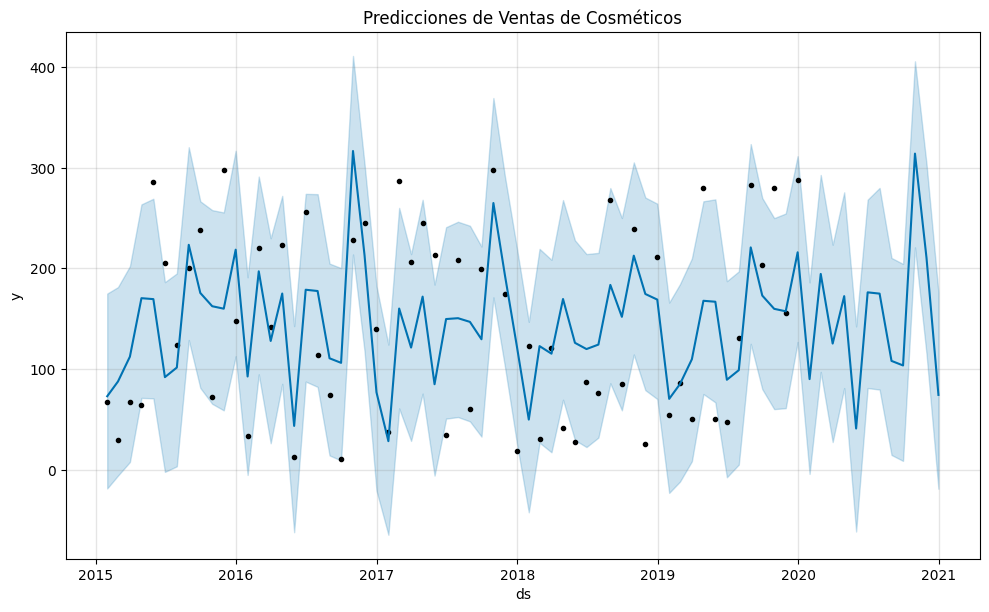

In [5]:

# Hacer predicciones futuras
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Visualizar las predicciones
model.plot(forecast)
plt.title('Predicciones de Ventas de Cosméticos')
plt.show()


In [6]:

# Análisis de regresión lineal
X = df[['pib_manufacturero', 'tasa_empleo', 'ipc', 'exportaciones']]
y = df['ventas_cosmeticos']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

# Crear el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = regressor.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
print(f'Error cuadrático medio: {mse}')


Error cuadrático medio: 10893.053487751764


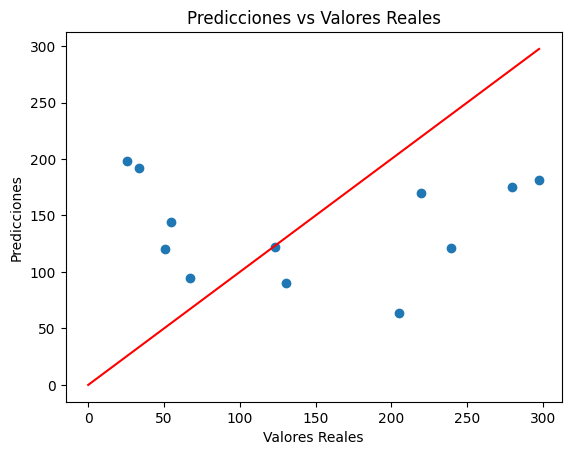

In [8]:

# Visualizar las predicciones vs valores reales
plt.scatter(y_test, predictions)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')  # Línea de referencia
plt.show()